In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [3]:
''' 
The BB84 Protocol makes use of the fact that measuring a
Qubit can change its state
'''
from qiskit import *
from qiskit import assemble
from numpy.random import randint

### How it Works?

If Bob measures the qubit in the same basis as Alice prepared in, He's sure to get the bit that she intended to send.

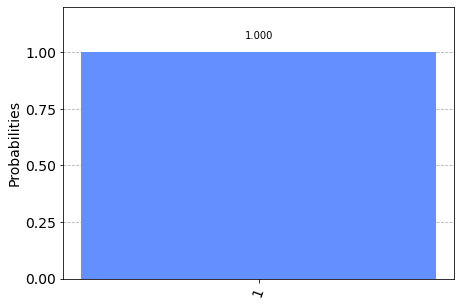

In [3]:
circ = QuantumCircuit(1,1)
'''
Suppose Alice prepares in the |-> basis'''
circ.x(0)
circ.h(0)

# now she sends it
circ.barrier()
 # and Bob Measures it in the same basis
circ.h(0)
circ.measure(0,0)


# Show the circuit
circ.draw('mpl')

# run it on the simulator
sim = Aer.get_backend('aer_simulator')
job = sim.run(assemble(circ))

plot_histogram(job.result().get_counts())

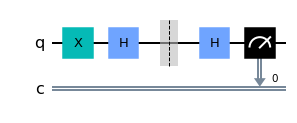

In [4]:
circ.draw('mpl')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


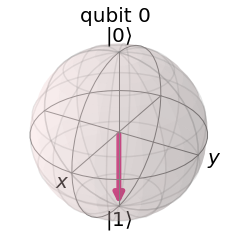

In [5]:
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = execute(circ, backend).result()
psi  = result.get_statevector(circ)
plot_bloch_multivector(psi)

### What if Someone Eavesdrop?

If there's an Eavesdropping, suppose Eve tries to intercept the signal and measures the qubit is some other basis, she'll change the state of the Qubit, and Bob will not measure the desired output with certainity.

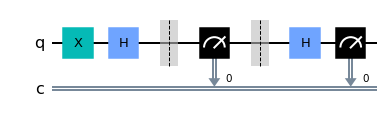

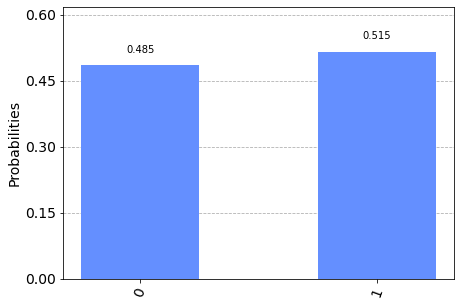

In [6]:
circ2 = QuantumCircuit(1,1)

# alice does the same as done above
circ2.x(0)
circ2.h(0)

circ2.barrier()
'''
Now suppose someone intercepts, and measures the circuit\
Measuring the Circuit is Equivalent of Apllying a Pauli-Z
gate
'''

circ2.measure(0,0)

circ2.barrier()
'''
Now after measuring, bob recieves the bit and he
measures it again(unknowingly its been measured before),
although he applies the same basis in which Alice Encodes the
bit
'''

circ2.h(0)
circ2.measure(0,0)

display(circ2.draw('mpl'))

sim = Aer.get_backend('aer_simulator')
job = sim.run(assemble(circ2))
plot_histogram(job.result().get_counts())

So, just a previous interception or Eavesdropping can change the outcome of the result that Bob will measure and they'll immediately know that there've been eavesdropping. Now, it's more like 50% chance of Bob measuring the desired Qubit and 50% for undesired one.

## Running the Full Algorithm

In [7]:
# generate a random set of bits

np.random.seed(seed=135)
n = 100

#  ALICE generates her bits

bits_alice = randint(2, size= n)
print(bits_alice)

[1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1]


#### Encoding

Now She choses a set of random basis to encode her qubits in. So, she'll generate another set of 0s and 1s and assign them X or the Z- basis

In [8]:
bases_alice = randint(2, size = n)
print(bases_alice)

[1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0]


In [4]:
# now lets encode
message = []
def encode(bits, bases):
    '''
    The Encode function will take two inputs 
    which are the bits and the bases,
    if the base is 0, we'll send them in the Z-basis
    and if the base is 1, we'll send them in the X-basis
    '''
    
    for i in range(n):
        circ = QuantumCircuit(1,1)
        if (bases[i] == 0):
            if (bits[i] == 0):
                pass
            else:
                circ.x(0)
        else:
            if(bits[i]==0):
                circ.h(0)
            else:
                circ.x(0)
                circ.h(0)
        circ.barrier()
        message.append(circ)
    return message

In [10]:
message = encode(bits_alice, bases_alice)


### Visualizing a Circuit

In [11]:
print('bit = %i' % bits_alice[41])
print('basis = %i' % bases_alice[41])

bit = 1
basis = 0


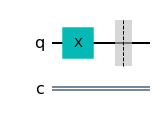

In [12]:
message[41].draw()

Now Alice sends the message over a Quantum Channel, here the message is open to interception, since this Quantum Channel is not secure.
Here we suppose the interception didn't happened

In [13]:
# now bob will make its own basea randomly and will try to measure the bits sent by ALice

bases_bob = randint(2, size = n)
print(bases_bob)

[1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0]


In [5]:
# measuring circuits

def measure(message, bases):
    '''
    This function will take the message sent by Alice, and
    take the bases by Bob and will measure acordingly.
    '''
    
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for i in range(n):
        if (bases[i] == 0):
            message[i].measure(0,0)
        if(bases[i] == 1):
            message[i].h(0)
            message[i].measure(0,0)
        sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[i], shots  = 1, memory = True)
        result = sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [15]:
results_bob = measure(message, bases_bob)
print(results_bob)

[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


### Check a Random Circuit

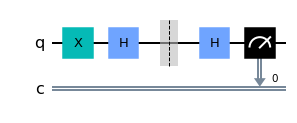

In [16]:
message[0].draw('mpl')

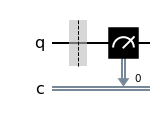

In [17]:
message[34].draw('mpl')

### Comparing the basis

Now Alice tell Bob the basis, in which she encoded the bits , and Bob discard the ones where there's a mismatch.

In [6]:
def remove(sender, reciever, bits):
    '''
    compare the bases of both alice and bob
    and keep the ones where the bases are same
    '''
    
    correct = []
    for i in range(n):
        if sender[i] == reciever[i]:
            correct.append(bits[i])
    return correct

In [19]:
key_alice = remove(bases_alice, bases_bob,bits_alice)
print(key_alice)
print("The Lenght is...",len(key_alice))

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
The Lenght is... 43


In [20]:
key_bob = remove(bases_alice, bases_bob,results_bob)
print(key_bob)
print("The Lenght is...",len(key_bob))

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
The Lenght is... 43


### Checking whether the Algorithm worked perfectly
They compare some random bits and see if they match.

In [7]:
def correction(bits, select):
    sample = []
    for i in select:
        i = np.mod(i, len(bits))
        
        sample.append(bits.pop(i))
    return sample

In [22]:
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = correction(key_bob, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = correction(key_alice, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
alice_sample = [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]


In [23]:
# now checking the correction
bob_sample == alice_sample

True

## Now Assume interception Happens

We'll measure the circuit prior to Bob's measurement, just like how an interception will work, and will then compare whether interception was detected or did it went undetected.

In [9]:

# same as above, making alice bits and encoding them in thebasis

np.random.seed(seed=135)
n = 100
alice_bits = randint(2, size=n)


alice_bases = randint(2, size=n)
message = encode(alice_bits, alice_bases)





In [10]:
# adding the interception step

bases_eve = randint(2, size = n)
intercepted_message = measure(message, bases_eve)
print(intercepted_message)

[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]


In [11]:

bob_bases = randint(2, size=n)


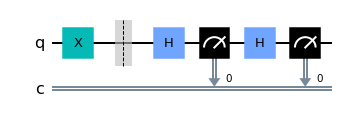

In [12]:
# now send the intercepted message to Bob
bob_results = measure(message, bob_bases)

message[1].draw()

In [14]:

bob_key = remove(alice_bases, bob_bases, bob_results)
alice_key = remove(alice_bases, bob_bases, alice_bits)

In [16]:
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = correction(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = correction(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
alice_sample = [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]


In [17]:
bob_sample == alice_sample

False

If Alice and Bob compare 1 bit from their keys, the probability the bits will match is  $0.75$, and if so they will not notice Eve's interception. If they measure 2 bits, there is a  $0.75^2=0.5625$ chance of the interception not being noticed. We can see that the probability of Eve going undetected can be calculated from the number of bits $(x )$ Alice and Bob chose to compare:

$P(undetected)=0.75^x$
 
If we decide to compare 15 bits as we did above, there is a 1.3% chance Eve will be undetected. If this is too risky for us, we could compare 50 bits instead, and have a 0.00006% chance of being spied upon unknowingly.

In [20]:
# If the samples do not match interception was detected, else it went undetected.

if bob_sample != alice_sample:
    print("Interference was detected.")
else:
    print("Inteference went undetected!")

Interference was detected.
